# 🐍 Bangladeshi Snake Recognizer  

| No. | English Name            | বাংলা নাম          | Type            |
|-----|-------------------------|-------------------|-----------------|
| 1   | Spectacled Cobra        | গোখরা             | Venomous        |
| 2   | Monocled Cobra          | চশমা গোখরা        | Venomous        |
| 3   | King Cobra              | রাজ গোখরা         | Venomous        |
| 4   | Common Krait            | কালাই সাপ         | Venomous        |
| 5   | Banded Krait            | ব্যান্ডেড ক্রাইট  | Venomous        |
| 6   | Russell's Viper         | চন্দ্রবোড়া        | Venomous        |
| 7   | Saw-scaled Viper        | একিস ভাইপার      | Venomous        |
| 8   | Green Pit Viper         | সবুজ পিট ভাইপার   | Venomous        |
| 9   | Beaked Sea Snake        | সমুদ্র সাপ        | Venomous        |
| 10  | Yellow-lipped Sea Krait | সমুদ্র ক্রাইট     | Venomous        |
| 11  | Indian Rock Python      | আজগর              | Non-Venomous    |
| 12  | Rat Snake               | দাড়াশ             | Non-Venomous    |
| 13  | Checkered Keelback      | ধামন              | Non-Venomous    |
| 14  | Common Wolf Snake       | নেকড়ে সাপ         | Non-Venomous    |
| 15  | Green Trinket Snake     | সবুজ সাপ          | Non-Venomous    |
| 16  | Bronzeback Tree Snake   | গাছে ওঠা সাপ     | Non-Venomous    |
| 17  | Common Kukri Snake      | কুক্রি সাপ        | Non-Venomous    |




In [ ]:
#|default_exp app

In [ ]:
!pip install -Uqq fastai gradio nbdev

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.1 MB/s eta 0:00:00


In [ ]:
from fastai.vision.all import *

In [ ]:
#!export
from fastai.vision.all import load_learner
import gradio as gr
import os

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Bangladeshi_snake_recognizer

/content/drive/My Drive/Bangladeshi_snake_recognizer


In [ ]:
# #!export
model = load_learner('bangladeshi-snake-recognizer-v3.pkl')

In [ ]:
# Mapping English → Bangla
english_to_bangla = {
    "Banded Krait": "ব্যান্ডেড ক্রাইট",
    "Beaked Sea Snake": "সমুদ্র সাপ",
    "Bronzeback Tree Snake": "গাছে ওঠা সাপ",
    "Checkered Keelback": "ধামন",
    "Common Krait": "কালাই সাপ",
    "Common Kukri Snake": "কুক্রি সাপ",
    "Common Wolf Snake": "নেকড়ে সাপ",
    "Green Pit Viper": "সবুজ পিট ভাইপার",
    "Green Trinket Snake": "সবুজ সাপ",
    "Indian Rock Python": "আজগর",
    "King Cobra": "রাজ গোখরা",
    "Monocled Cobra": "চশমা গোখরা",
    "Rat Snake": "দাড়াশ",
    "Russell's Viper": "চন্দ্রবোড়া",
    "Saw-scaled Viper": "একিস ভাইপার",
    "Spectacled Cobra": "গোখরা",
    "Yellow-lipped Sea Krait": "সমুদ্র ক্রাইট"
}

# Mapping English → venom status
venom_status = {
    "Banded Krait": "Venomous",
    "Beaked Sea Snake": "Venomous",
    "Bronzeback Tree Snake": "Non-Venomous",
    "Checkered Keelback": "Non-Venomous",
    "Common Krait": "Venomous",
    "Common Kukri Snake": "Non-Venomous",
    "Common Wolf Snake": "Non-Venomous",
    "Green Pit Viper": "Venomous",
    "Green Trinket Snake": "Non-Venomous",
    "Indian Rock Python": "Non-Venomous",
    "King Cobra": "Venomous",
    "Monocled Cobra": "Venomous",
    "Rat Snake": "Non-Venomous",
    "Russell's Viper": "Venomous",
    "Saw-scaled Viper": "Venomous",
    "Spectacled Cobra": "Venomous",
    "Yellow-lipped Sea Krait": "Venomous"
}


In [ ]:
snake_details = {
    "Banded Krait": {
        "Found": "South and Southeast Asia (India, Bangladesh, Myanmar, Thailand)",
        "Venom Type": "Neurotoxic",
        "Danger": "Highly venomous; potentially fatal but generally shy"
    },
    "Beaked Sea Snake": {
        "Found": "Indian and Pacific Oceans, coastal waters of South Asia",
        "Venom Type": "Neurotoxic",
        "Danger": "Extremely venomous sea snake; can be deadly"
    },
    "Bronzeback Tree Snake": {
        "Found": "South and Southeast Asia, often in trees and bushes",
        "Venom Type": "Non-venomous",
        "Danger": "Harmless to humans"
    },
    "Checkered Keelback": {
        "Found": "South Asia, near rivers, ponds, and wetlands",
        "Venom Type": "Non-venomous",
        "Danger": "Harmless, sometimes mistaken for venomous snakes"
    },
    "Common Krait": {
        "Found": "Indian subcontinent (India, Bangladesh, Sri Lanka, Nepal)",
        "Venom Type": "Neurotoxic",
        "Danger": "Highly venomous; responsible for many snakebite deaths"
    },
    "Common Kukri Snake": {
        "Found": "South and Southeast Asia",
        "Venom Type": "Non-venomous",
        "Danger": "Harmless, but may bite defensively"
    },
    "Common Wolf Snake": {
        "Found": "South and Southeast Asia, often near human settlements",
        "Venom Type": "Non-venomous",
        "Danger": "Harmless, easily confused with kraits"
    },
    "Green Pit Viper": {
        "Found": "South and Southeast Asia, forests and plantations",
        "Venom Type": "Hemotoxic (sometimes with mild neurotoxic effects)",
        "Danger": "Venomous; bite is painful but rarely fatal"
    },
    "Green Trinket Snake": {
        "Found": "India, Bangladesh, Sri Lanka, Nepal",
        "Venom Type": "Non-venomous",
        "Danger": "Harmless, active in trees and bushes"
    },
    "Indian Rock Python": {
        "Found": "Indian subcontinent, grasslands, swamps, forests",
        "Venom Type": "Non-venomous (constrictor)",
        "Danger": "Large but harmless to humans; kills prey by constriction"
    },
    "King Cobra": {
        "Found": "India, Southeast Asia, forests and plantations",
        "Venom Type": "Neurotoxic",
        "Danger": "World’s longest venomous snake; highly dangerous"
    },
    "Monocled Cobra": {
        "Found": "South and Southeast Asia (especially Bangladesh, India, Thailand)",
        "Venom Type": "Neurotoxic",
        "Danger": "Highly venomous; responsible for many bites in Asia"
    },
    "Rat Snake": {
        "Found": "South and Southeast Asia, often near fields and villages",
        "Venom Type": "Non-venomous",
        "Danger": "Harmless, useful for controlling rodents"
    },
    "Russell's Viper": {
        "Found": "Indian subcontinent, grasslands, farmlands",
        "Venom Type": "Hemotoxic (with strong tissue-damaging effects)",
        "Danger": "Extremely dangerous; one of the 'Big Four' deadly snakes in India"
    },
    "Saw-scaled Viper": {
        "Found": "South Asia, Middle East, arid regions",
        "Venom Type": "Hemotoxic",
        "Danger": "Highly venomous; small but aggressive, responsible for many deaths"
    },
    "Spectacled Cobra": {
        "Found": "Indian subcontinent, fields, forests, villages",
        "Venom Type": "Neurotoxic",
        "Danger": "Highly venomous; iconic hooded cobra of India/Bangladesh"
    },
    "Yellow-lipped Sea Krait": {
        "Found": "Indian and Pacific Oceans, coastal Asia",
        "Venom Type": "Neurotoxic",
        "Danger": "Very venomous sea snake; rarely aggressive to humans"
    }
}


In [ ]:
def recognize_image(image):
    pred, idx, probs = model.predict(image)
    class_names = model.dls.vocab  # may have underscores

    # Combine English, Bangla, and Venom status for labels
    labels = [
        f"{cls.replace('_', ' ')} ({english_to_bangla[cls.replace('_', ' ')]}) [{venom_status[cls.replace('_', ' ')]}]"
        for cls in class_names
    ]

    # Create dictionary with probabilities
    result = dict(zip(labels, map(float, probs)))

    # Find top prediction
    top_snake = max(result, key=result.get)
    top_prob = result[top_snake] * 100  # as percentage

    return {
        "predictions": {k: v*100 for k, v in result.items()},  # all probs in %
        "top_prediction": {"snake": top_snake, "probability": top_prob}
    }

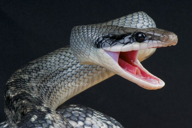

In [ ]:
img = PILImage.create(f'test images/unknown_04.jpg')
img.thumbnail((192,192))
img

In [ ]:
recognize_image(img)

{'predictions': {'Banded Krait (ব্যান্ডেড ক্রাইট) [Venomous]': 0.001219696605403442,
  'Beaked Sea Snake (সমুদ্র সাপ) [Venomous]': 0.00589518022025004,
  'Bronzeback Tree Snake (গাছে ওঠা সাপ) [Non-Venomous]': 0.0005967284778307658,
  'Checkered Keelback (ধামন) [Non-Venomous]': 0.00829224445624277,
  'Common Krait (কালাই সাপ) [Venomous]': 0.008215740672312677,
  'Common Kukri Snake (কুক্রি সাপ) [Non-Venomous]': 0.0012797900126315653,
  'Common Wolf Snake (নেকড়ে সাপ) [Non-Venomous]': 0.0002754187562459265,
  'Green Pit Viper (সবুজ পিট ভাইপার) [Venomous]': 0.0007651973646716215,
  'Green Trinket Snake (সবুজ সাপ) [Non-Venomous]': 0.015407305909320712,
  'Indian Rock Python (আজগর) [Non-Venomous]': 0.0023563577997265384,
  'King Cobra (রাজ গোখরা) [Venomous]': 0.13687829487025738,
  'Monocled Cobra (চশমা গোখরা) [Venomous]': 0.1396568724885583,
  'Rat Snake (দাড়াশ) [Non-Venomous]': 99.59267377853394,
  "Russell's Viper (চন্দ্রবোড়া) [Venomous]": 0.007549461588496342,
  'Saw-scaled Viper (একিস 

In [ ]:
# Path to your test images folder
test_folder = "test images"

# Collect all image paths
example_images = [
    os.path.join(test_folder, f)
    for f in os.listdir(test_folder)
    if f.endswith((".jpg", ".png", ".jpeg"))
]

def gradio_predict(img):
    preds = recognize_image(img)
    label_dict = {k: v/100 for k, v in preds['predictions'].items()}

    top_prediction = preds['top_prediction']['snake']
    english_name = top_prediction.split(" (")[0]  # Extract English name only

    # Lookup details
    details = snake_details.get(english_name, {})
    if details:
        details_text = (
            f"### Snake Details\n"
            f"- **Found:** {details['Found']}\n"
            f"- **Venom Type:** {details['Venom Type']}\n"
            f"- **Danger:** {details['Danger']}"
        )
    else:
        details_text = "No details available."

    return top_prediction, details_text, label_dict


#Interface must be outside the function
iface = gr.Interface(
    fn=gradio_predict,
    inputs=gr.Image(type="pil"),
    outputs=[
        gr.Textbox(label="Top Prediction"),
        gr.Markdown(label="Snake Details"),   #Prettier output
        gr.Label(num_top_classes=None, label="All Predictions")
    ],
    title="Snake Recognition",
    description="Upload a snake image OR click an example to identify it along with venom status.",
    examples=example_images
)

iface.launch()


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c44657fb27c4b1ea54.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
